# Notebook: Pandas Beyond Basics

## Table of Contents
<ul>
<li><a href="#Transform">Transform</a></li>
<li><a href="#Reshape">Reshape</a></li>
<li><a href="#Group">Group</a></li>
<li><a href="#Case_Study">Case Study</a></li>
<li><a href="#Merge">Merge</a></li>
<li><a href="#Joins">Joins</a></li>
</ul>

Given a pair of label-based indices, sometimes it's necessary to find the corresponding positions. In this exercise, you will use the Pennsylvania election results again. The DataFrame is provided for you as election. 

In [1]:
# Import pandas
import pandas as pd

In [2]:
# Read in filename and set the index: election
filename = './data/pennsylvania2012_turnout.csv'
election = pd.read_csv(filename, index_col='county')

In [3]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])


True


In [5]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())


           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


In [6]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter']

# Print the p_counties DataFrame
print(p_counties)

# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1]

# Print the p_counties_rev DataFrame
print(p_counties_rev)


             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  
             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.0

In [7]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, 'Romney':]

# Print the output of right_columns.head()
print(right_columns.head())


          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


In [8]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows, cols]

# Print the three_counties DataFrame
print(three_counties)


              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


In [9]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election.loc[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)


             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


In [10]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
print(election.info())


<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


In certain scenarios, it may be necessary to remove rows and columns with missing data from a DataFrame. The .dropna() method is used to perform this action. You'll now practice using this method on a dataset obtained from Vanderbilt University, which consists of data from passengers on the Titanic.
http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html

In [11]:
titanic = pd.read_csv('./data/titanic.csv')

In [12]:
# Select the 'age' and 'cabin' columns: df
df = titanic[['age','cabin']]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)

# Drop columns in titanic with more than 1000 missing values
print(titanic.dropna(thresh=1000, axis='columns').info())


(1309, 2)
(272, 2)
(1069, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


The .apply() method can be used on a pandas DataFrame to apply an arbitrary Python function to every element. In this exercise you'll take daily weather data in Pittsburgh in 2013 obtained from Weather Underground.
https://www.wunderground.com/history

In [ ]:
# weather = pd.read_csv('./data/')

In [ ]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())


The .map() method is used to transform values according to a Python dictionary look-up. In this exercise you'll practice this method while returning to working with the election DataFrame, which has been pre-loaded for you.

In [13]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

# Print the output of election.head()
print(election.head())


          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


You will be working with the election DataFrame - it has been pre-loaded for you.

In [14]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())


<class 'numpy.ndarray'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


In [ ]:
# eggs  salt  spam
# month                  
# Jan      47  12.0    17
# Feb     110  50.0    31
# Mar     221  89.0    72
# Apr      77  87.0    20
# May     132   NaN    52
# Jun     205  60.0    55

In [ ]:
# sales = pd.read_csv()
pd.read_csv('./data/')

In [ ]:
# Create the list of new indexes: new_idx
new_idx = [month.upper() for month in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
print(sales)


In [ ]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Print the sales DataFrame
print(sales)

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

# Print the sales dataframe again
print(sales)


In [ ]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months

# Print the modified sales DataFrame
print(sales)


In [ ]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

# Print sales['CA':'TX']
print(sales.loc['CA':'TX'])


In [ ]:
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)


In [ ]:
# Set the index to the column 'state': sales
sales = sales.set_index(['state'])

# Print the sales DataFrame
print(sales)

# Access the data from 'NY'
print(sales.loc['NY'])


In [ ]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY', 1), :]

# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA', 'TX'], 2), :]

# Look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 2), :]


Suppose you started a blog for a band, and you would like to log how many visitors you have had, and how many signed-up for your newsletter. To help design the tours later, you track where the visitors are. A DataFrame called users consisting of this information has been pre-loaded for you.

In [47]:
users = pd.read_csv('./data/users.csv')

In [48]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday', columns='city', values='visitors')

# Print the pivoted DataFrame
print(visitors_pivot)


city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


In [49]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday', columns='city', values='signups')

# Print signups_pivot
print(signups_pivot)

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday', columns='city')

# Print the pivoted DataFrame
print(pivot)


city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12
        Unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12


In [50]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level='weekday')

# Print the byweekday DataFrame
print(byweekday)

# Stack byweekday by 'weekday' and print it
print(byweekday.stack(level='weekday'))


Unnamed: 0  0         0
            1         1
            2         2
            3         3
weekday     0       Sun
            1       Sun
            2       Mon
            3       Mon
city        0    Austin
            1    Dallas
            2    Austin
            3    Dallas
visitors    0       139
            1       237
            2       326
            3       456
signups     0         7
            1        12
            2         3
            3         5
dtype: object


AttributeError: 'Series' object has no attribute 'stack'

In [51]:
# Unstack users by 'city': bycity
bycity = users.unstack(level='city')

# Print the bycity DataFrame
print(bycity)

# Stack bycity by 'city' and print it
print(bycity.stack(level='city'))


Unnamed: 0  0         0
            1         1
            2         2
            3         3
weekday     0       Sun
            1       Sun
            2       Mon
            3       Mon
city        0    Austin
            1    Dallas
            2    Austin
            3    Dallas
visitors    0       139
            1       237
            2       326
            3       456
signups     0         7
            1        12
            2         3
            3         5
dtype: object


AttributeError: 'Series' object has no attribute 'stack'

In [52]:
# Stack 'city' back into the index of bycity: newusers
newusers = bycity.stack(level='city')

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0, 1)

# Print newusers and verify that the index is not sorted
print(newusers)

# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
print(newusers)

# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

AttributeError: 'Series' object has no attribute 'stack'

A DataFrame called visitors_by_city_weekday has been pre-loaded for you. Explore it in the IPython Shell and see that it is the users DataFrame from previous exercises with the rows indexed by 'weekday', columns indexed by 'city', and values populated with 'visitors'.

In [56]:
visitors_by_city_weekday = visitors_pivot

In [57]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = visitors_by_city_weekday.reset_index() 

# Print visitors_by_city_weekday
print(visitors_by_city_weekday)

# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars=['weekday'], value_name='visitors')

# Print visitors
print(visitors)


city weekday  Austin  Dallas
0        Mon     326     456
1        Sun     139     237
  weekday    city  visitors
0     Mon  Austin       326
1     Sun  Austin       139
2     Mon  Dallas       456
3     Sun  Dallas       237


In [58]:
# Melt users: skinny
skinny = pd.melt(users, id_vars=['weekday' ,'city'])

# Print skinny
print(skinny)


   weekday    city    variable  value
0      Sun  Austin  Unnamed: 0      0
1      Sun  Dallas  Unnamed: 0      1
2      Mon  Austin  Unnamed: 0      2
3      Mon  Dallas  Unnamed: 0      3
4      Sun  Austin    visitors    139
5      Sun  Dallas    visitors    237
6      Mon  Austin    visitors    326
7      Mon  Dallas    visitors    456
8      Sun  Austin     signups      7
9      Sun  Dallas     signups     12
10     Mon  Austin     signups      3
11     Mon  Dallas     signups      5


In [59]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])

# Print the users_idx DataFrame
print(users_idx)

# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)

# Print the key-value pairs
print(kv_pairs)


                Unnamed: 0  visitors  signups
city   weekday                               
Austin Sun               0       139        7
Dallas Sun               1       237       12
Austin Mon               2       326        3
Dallas Mon               3       456        5
      variable  value
0   Unnamed: 0      0
1   Unnamed: 0      1
2   Unnamed: 0      2
3   Unnamed: 0      3
4     visitors    139
5     visitors    237
6     visitors    326
7     visitors    456
8      signups      7
9      signups     12
10     signups      3
11     signups      5


In [60]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index='weekday', columns='city')

# Print by_city_day
print(by_city_day)


        Unnamed: 0        signups        visitors       
city        Austin Dallas  Austin Dallas   Austin Dallas
weekday                                                 
Mon              2      3       3      5      326    456
Sun              0      1       7     12      139    237


In [61]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))


         Unnamed: 0  city  signups  visitors
weekday                                     
Mon               2     2        2         2
Sun               2     2        2         2
True


In [62]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)

# Print signups_and_visitors
print(signups_and_visitors)

# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', aggfunc=sum, margins=True)

# Print signups_and_visitors_total
print(signups_and_visitors_total)


         Unnamed: 0  signups  visitors
weekday                               
Mon               5        8       782
Sun               1       19       376
         Unnamed: 0  signups  visitors
weekday                               
Mon               5        8       782
Sun               1       19       376
All               6       27      1158


In this exercise, you will return to working with the Titanic dataset from Chapter 1 and use .groupby() to analyze the distribution of passengers who boarded the Titanic.

The 'pclass' column identifies which class of ticket was purchased by the passenger and the 'embarked' column indicates at which of the three ports the passenger boarded the Titanic. 'S' stands for Southampton, England, 'C' for Cherbourg, France and 'Q' for Queenstown, Ireland.

In [46]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)


pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


In this exercise, you'll use two data sets from Gapminder.org to investigate the average life expectancy (in years) at birth in 2010 for the 6 continental regions. To do this you'll read the life expectancy data per country into one pandas DataFrame and the association between country and region into another. 

In [44]:
life_fname = './data/gapminder_tidy.csv'
# regions_fname = './data/'

In [45]:
# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname, index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())


NameError: name 'regions_fname' is not defined

In [39]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

# Print the median fare in each class
print(aggregated.loc[:, ('fare','median')])


pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64
pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [36]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('./data/gapminder_tidy.csv', index_col=['Year','region','Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))


                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


In [ ]:
# Read file: sales
sales = pd.read_csv('./data/sales.csv', index_col='Date', parse_dates=True)

# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
print(units_sum)


In [37]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life','fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
print(gm_outliers)


NameError: name 'gapminder_2010' is not defined

In [38]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic.age
titanic.age = by_sex_class.age.transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))


      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

In [ ]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])


In [ ]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)


In [ ]:
# Read the CSV file into a DataFrame: sales
sales = pd.read_csv('./data/sales.csv', index_col='Date', parse_dates=True)

# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)
print(by_com_filt)


In [34]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)


age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


## CASE STUDY!!!!

The DataFrame has been pre-loaded for you as medals.

In [21]:
medals = pd.read_csv('./data/all_medalists.csv')

In [22]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))


USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [23]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))


Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


In [24]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)


      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [25]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)


                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [26]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus] 

# Print suspect
print(suspect)


         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


In [27]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))


NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


In [28]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition>=1952) & (medals.Edition<=1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)


NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [29]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())


URS    8
USA    2
dtype: int64


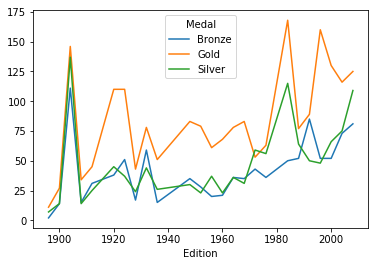

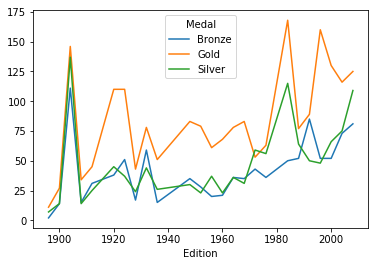

In [31]:
import matplotlib.pyplot as plt
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()


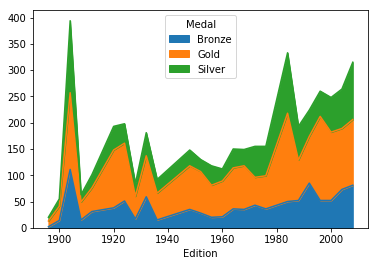

In [32]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()


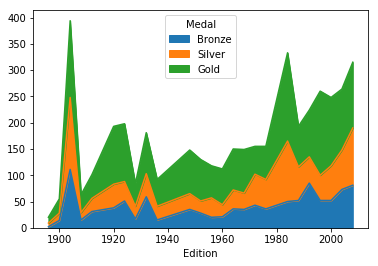

In [33]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()
